<a href="https://colab.research.google.com/github/almareshe/Tarea-2-/blob/main/Ejercicio_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficas del problema de Dirichlet

**Ejercicio b)**

La solución de la ecuación de Laplace
$$\frac{\partial u^2}{\partial x^2} = \frac{\partial^2 u}{\partial y^2} \;\;\; 0<x<1; \;\; 0<y<1$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(1,y)=0$$
Y la condición inicial:
$$u(0,y)=10y \;\;\;\;\;\; \frac{\partial u}{\partial x}|_{1}=-1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=\sum_{n=1}^{\infty}sin(nπy) \left [ \left(\frac{-20(-1^n)}{nπ}\right)cosh(nπx)+\left(-\frac{2}{nπcosh(nπ)}\frac{1-(-1^n)}{nπ}\right)+\frac{20(-1^n)}{nπ}\frac{sinh(nπ)}{cosh(nπ)}sinh(nπx)\right] $$

In [1]:
from pylab import *

In [2]:
def u_xy(x,y,N=10):
    f=zeros((len(x),len(y)))
    for i in range(len(y)):
      for n in range (1,N):
        a=(-20*((-1)**n))/(n*pi)
        c=(-2/cosh(n*pi))*((1-(-1)**n)/n**2*pi**2)
        b=(sinh(n*pi)/cosh(n*pi))
        f[:,i] += sin(n*pi*y)*((a*cosh(n*pi*x[i]))+((c-a*b)*sinh(n*pi*x[i])))
    return f

In [3]:
x = linspace(0,1,1000)
y = linspace(0,1,1000)
U = u_xy(x,y)

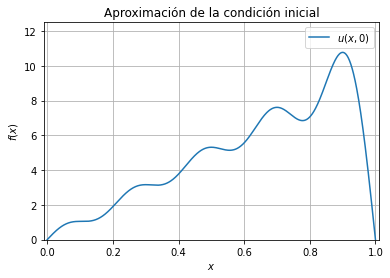

In [4]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,12.5]),grid(),legend()
show()

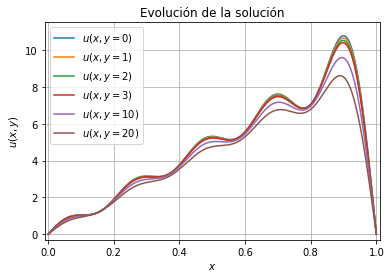

In [5]:
plot(x,U[:,0],label='$u(x,y=0)$') 
plot(x,U[:,1],label='$u(x,y=1)$')
plot(x,U[:,2],label='$u(x,y=2)$')
plot(x,U[:,3],label='$u(x,y=3)$')
plot(x,U[:,10],label='$u(x,y=10)$')
plot(x,U[:,20],label='$u(x,y=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.30,11.5]),grid(),legend()
show()

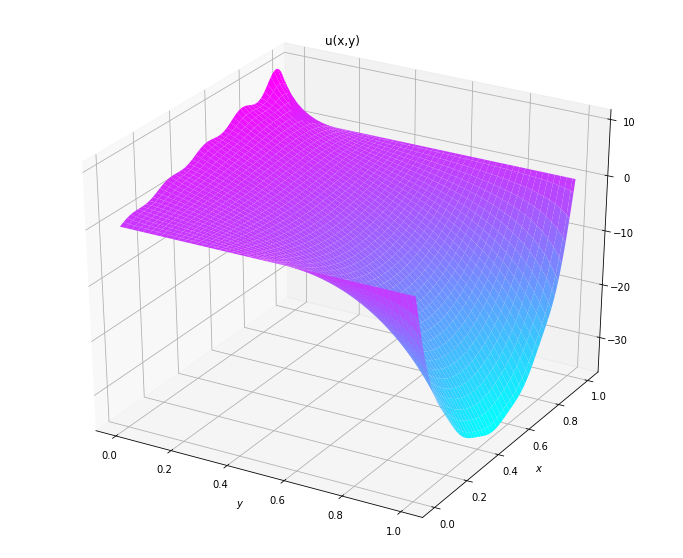

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_xy(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="cool")